In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/cldbrst_dtst.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.dtypes

,0
Date,object
Location,object
MinimumTemperature,float64
MaximumTemperature,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDirection,object
WindGustSpeed,float64
WindDirection9am,object


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,1485
MaximumTemperature,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDirection,10326
WindGustSpeed,10263
WindDirection9am,10566


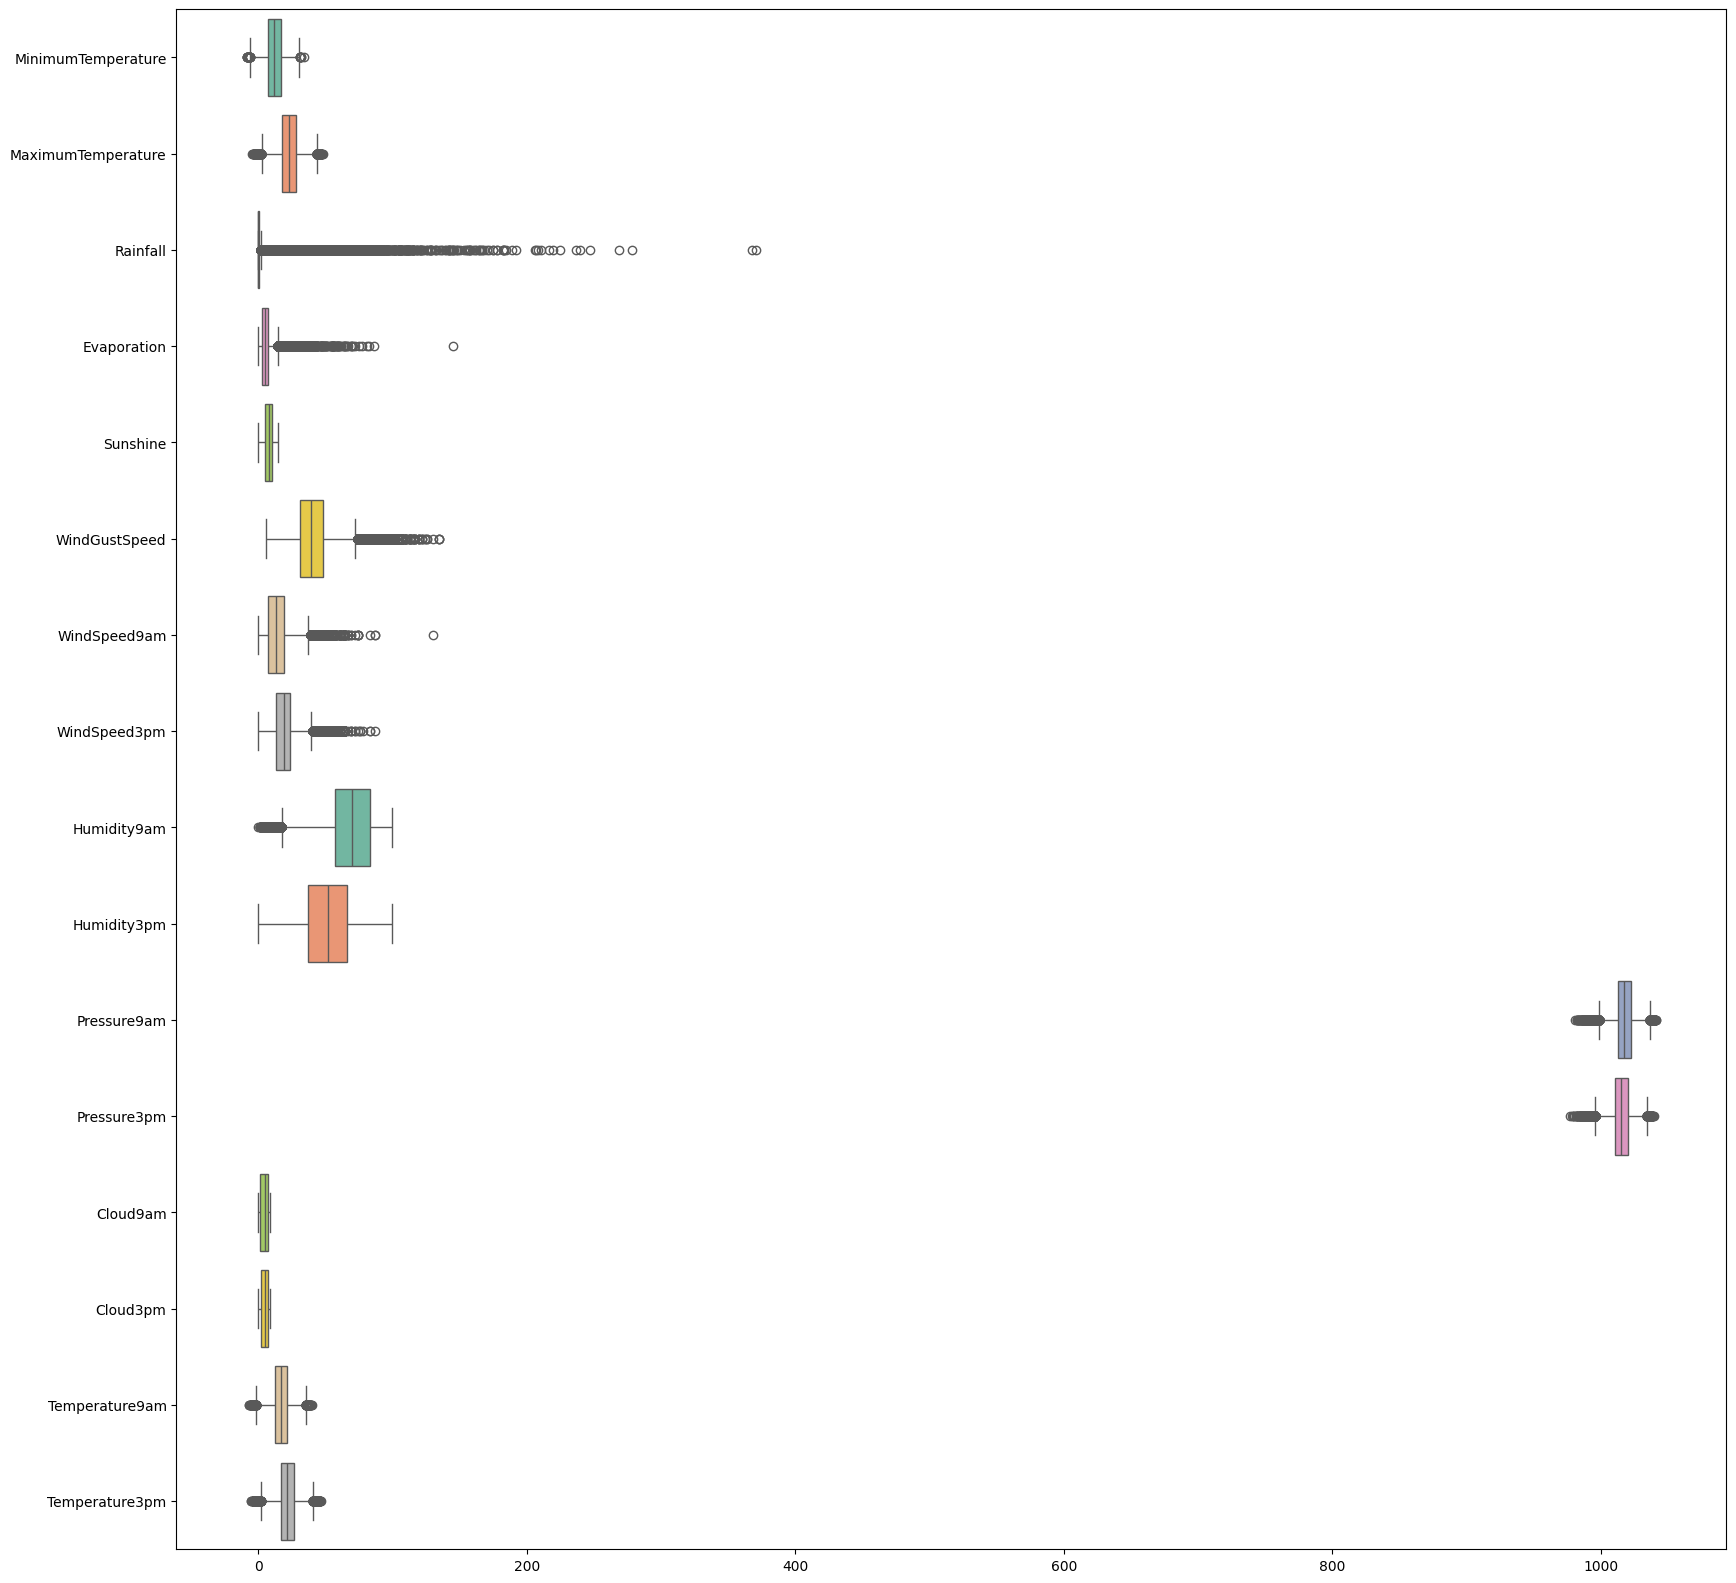

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.show()
#boxplot


<ipython-input-6-f4bf7cf63eaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["Temperature3pm"], orient='h', palette='Set2')


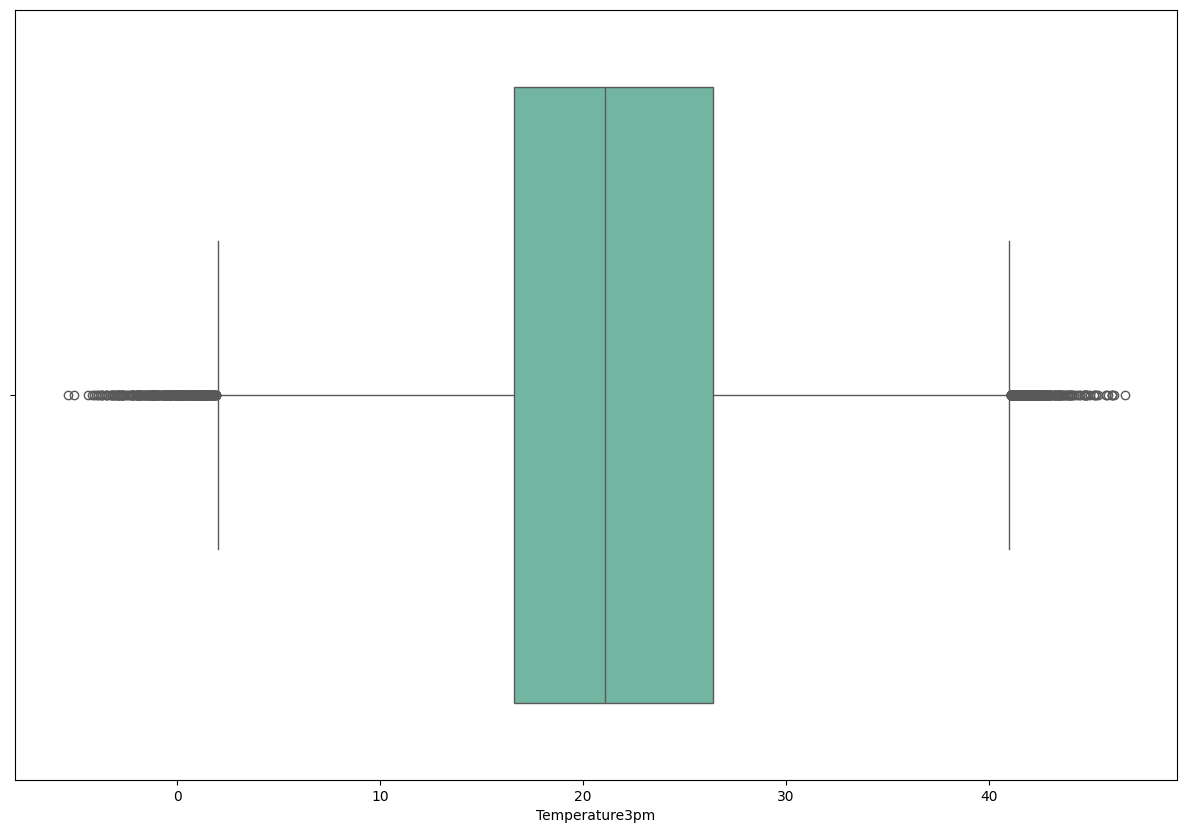

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df["Temperature3pm"], orient='h', palette='Set2')
plt.show()


<ipython-input-7-71eb372578ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df["Rainfall"], orient='h', palette='Set2')


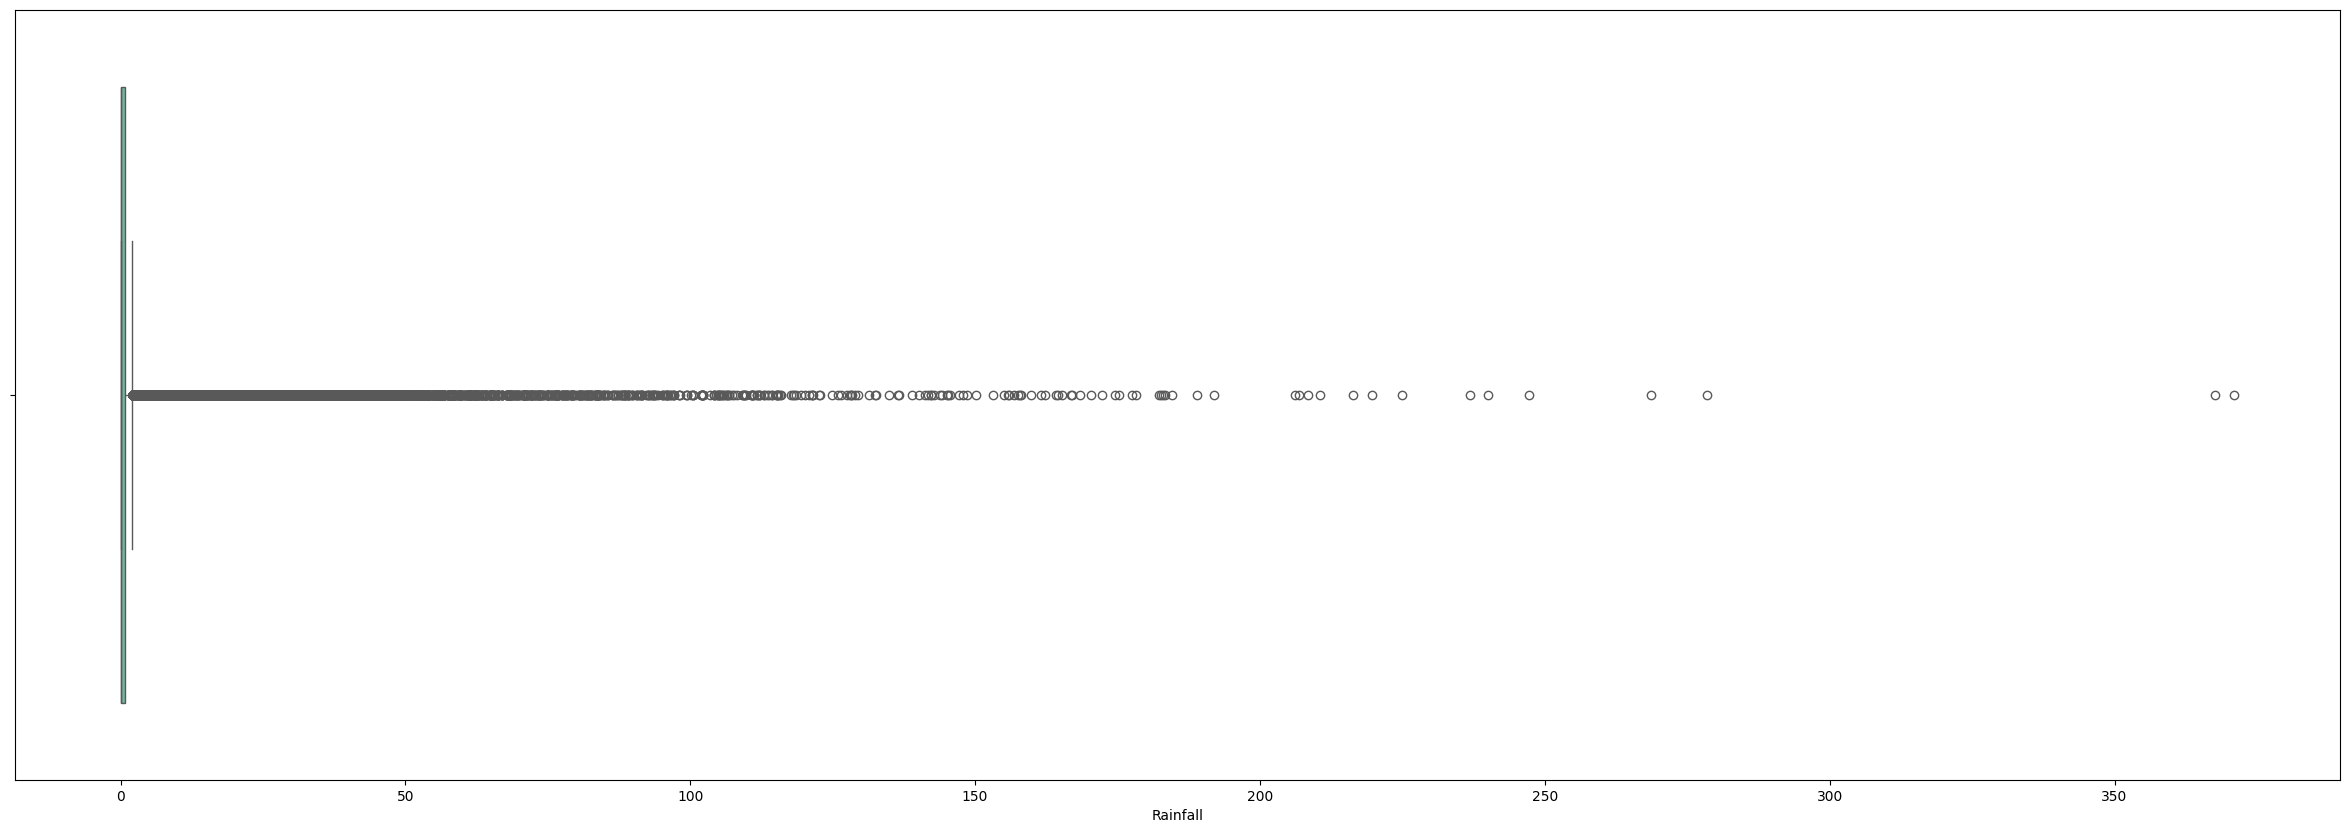

In [ ]:

plt.figure(figsize=(30, 10))
sns.boxplot(data=df["Rainfall"], orient='h', palette='Set2')
plt.show()


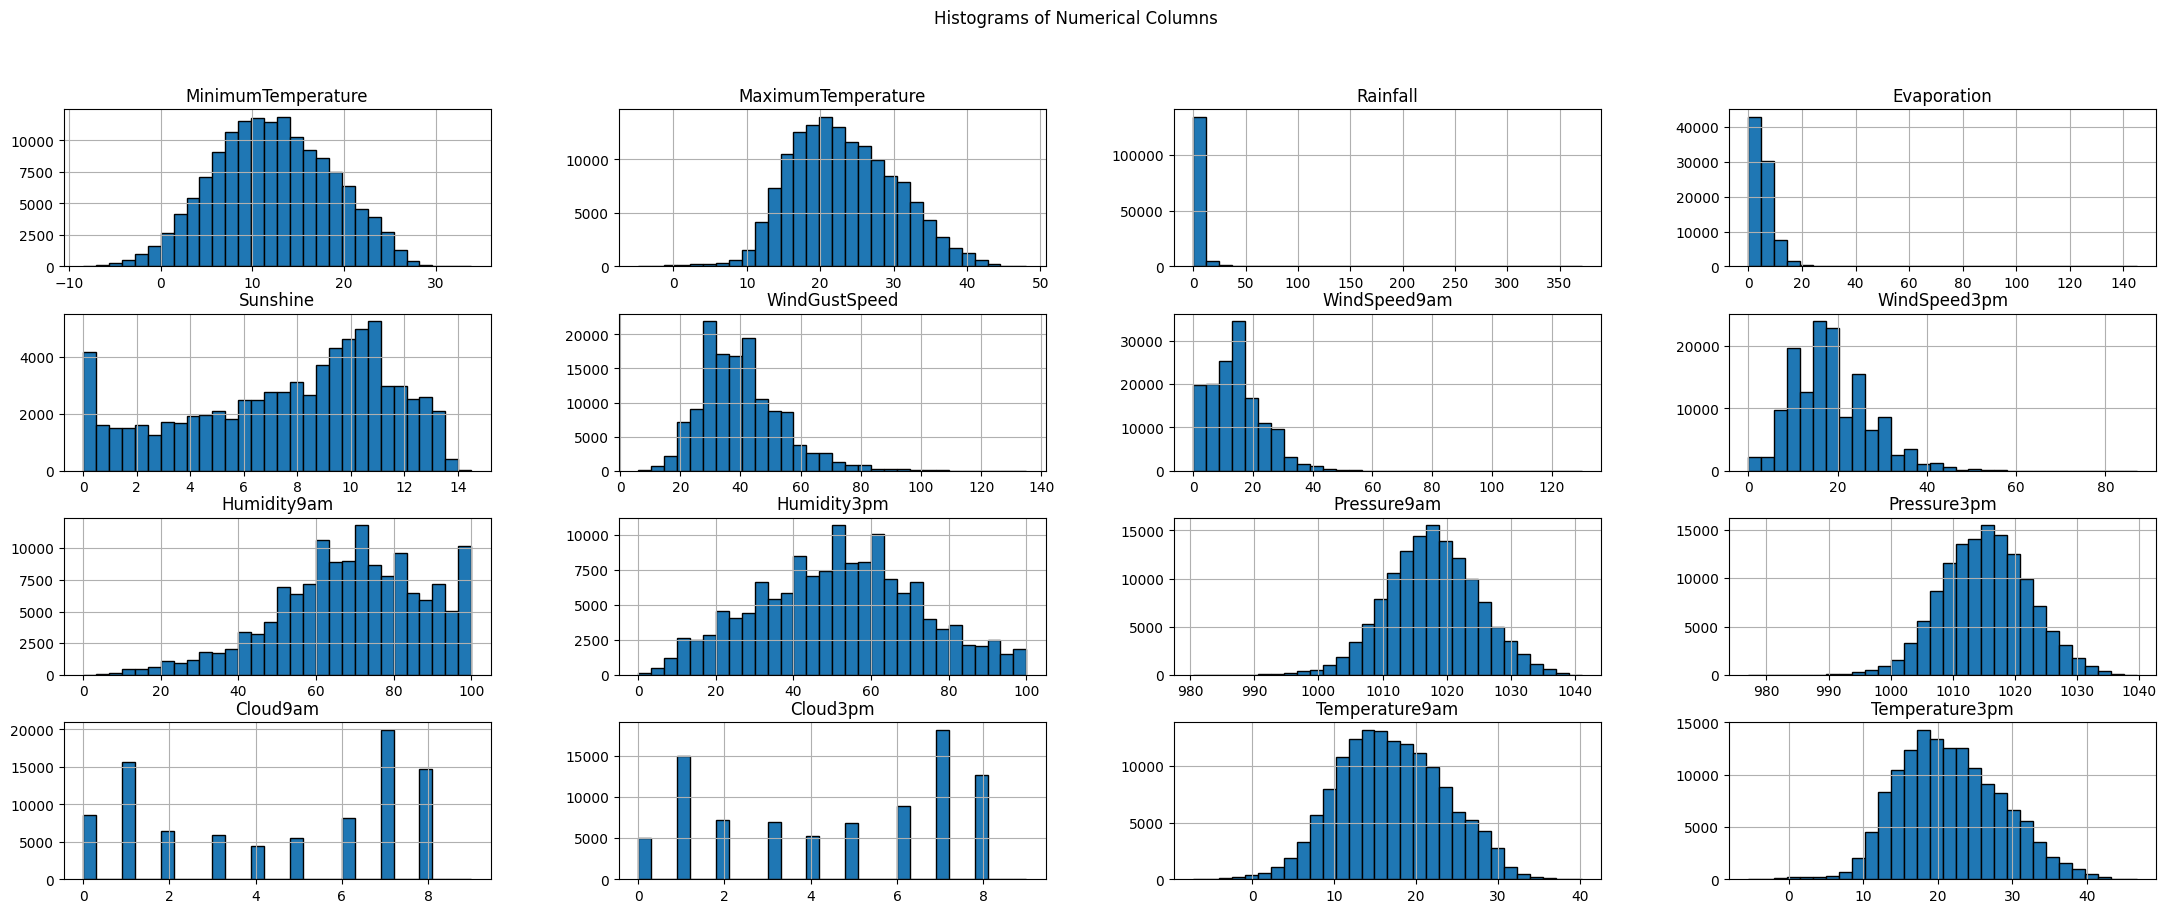

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for all numerical columns
df.hist(bins=30, figsize=(27, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()


In [ ]:
#Approach	   When to Use	                Advantages	                            Disadvantages
#Mean	       Symmetric, normal data	      Quick and easy to compute	              Sensitive to outliers, distorts skewed data
#Median	     Skewed, with outliers	      Robust, preserves central tendency	    Can be slower for large datasets (less efficient than mean)

#WE NEED TO LEARN TO READ GRAPHS
# MEAN WILL BE AFFECTED BCS OF OUTLIERS

In [ ]:
from scipy.stats import skew

# Iterate through columns to check skewness and identify fill strategy
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Only process columns with NaN
        # Calculate skewness for each column inside the loop
        if pd.api.types.is_numeric_dtype(df[column]):  # Ensure the column is numeric
            column_skewness = skew(df[column].dropna())  # Drop NaN and calculate skewness
            if abs(column_skewness) > 0.5:  # Threshold for skewness (positive or negative)
                # If skewed, print to fill with median
                print(f"Fill {column} with median due to skewness {column_skewness:.2f}")
            else:
                # If not skewed, print to fill with mean
                print(f"Fill {column} with mean due to skewness {column_skewness:.2f}")


Fill MinimumTemperature with mean due to skewness 0.02
Fill MaximumTemperature with mean due to skewness 0.22
Fill Rainfall with median due to skewness 9.84
Fill Evaporation with median due to skewness 3.76
Fill Sunshine with mean due to skewness -0.50
Fill WindGustSpeed with median due to skewness 0.87
Fill WindSpeed9am with median due to skewness 0.78
Fill WindSpeed3pm with median due to skewness 0.63
Fill Humidity9am with mean due to skewness -0.48
Fill Humidity3pm with mean due to skewness 0.03
Fill Pressure9am with mean due to skewness -0.10
Fill Pressure3pm with mean due to skewness -0.05
Fill Cloud9am with mean due to skewness -0.23
Fill Cloud3pm with mean due to skewness -0.23
Fill Temperature9am with mean due to skewness 0.09
Fill Temperature3pm with mean due to skewness 0.24


In [ ]:
from scipy.stats import skew

# Lists to store columns that need mean or median
columns_to_fill_with_mean = []
columns_to_fill_with_median = []

# Iterate through columns to check skewness and identify fill strategy
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Only process columns with NaN
        # Check if column is numeric before calculating skewness
        if pd.api.types.is_numeric_dtype(df[column]):
            column_skewness = skew(df[column].dropna())

            if abs(column_skewness) > 0.5:  # Threshold for skewness (positive or negative)
                columns_to_fill_with_median.append(column)  # Add to median list
            else:
                columns_to_fill_with_mean.append(column)  # Add to mean list

# Print the columns that need to be filled with mean or median
print("Columns that need to be filled with mean:", columns_to_fill_with_mean)
print("Columns that need to be filled with median:", columns_to_fill_with_median)


Columns that need to be filled with mean: ['MinimumTemperature', 'MaximumTemperature', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am', 'Temperature3pm']
Columns that need to be filled with median: ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']


In [ ]:
df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,1485
MaximumTemperature,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDirection,10326
WindGustSpeed,10263
WindDirection9am,10566


In [ ]:
for column in columns_to_fill_with_mean:
    df[column].fillna(df[column].mean(), inplace=True)
    print(f"Filled {column} with mean.")

Filled MinimumTemperature with mean.
Filled MaximumTemperature with mean.
Filled Sunshine with mean.
Filled Humidity9am with mean.
Filled Humidity3pm with mean.
Filled Pressure9am with mean.
Filled Pressure3pm with mean.
Filled Cloud9am with mean.
Filled Cloud3pm with mean.
Filled Temperature9am with mean.
Filled Temperature3pm with mean.


<ipython-input-7-3e2bd6227372>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
for column in columns_to_fill_with_median:
    df[column].fillna(df[column].median(), inplace=True)
    print(f"Filled {column} with median.")

Filled Rainfall with median.
Filled Evaporation with median.
Filled WindGustSpeed with median.
Filled WindSpeed9am with median.
Filled WindSpeed3pm with median.


<ipython-input-18-85616dc1b230>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,0
MaximumTemperature,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDirection,10326
WindGustSpeed,0
WindDirection9am,10566


In [ ]:
# COLUMNS HAVING NULLS HAVE NON NUMERIC DATA
#FILL CATEGORICAL DATA WITH MODE

In [ ]:
df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.900000,0.6,4.8,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.100000,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.700000,0.0,4.8,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.000000,0.0,4.8,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.300000,1.0,4.8,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.400000,0.0,4.8,7.611178,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.300000,0.0,4.8,7.611178,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.900000,0.0,4.8,7.611178,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.000000,0.0,4.8,7.611178,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [ ]:
pd.set_option('display.max_columns',23)

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,0
MaximumTemperature,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDirection,10326
WindGustSpeed,0
WindDirection9am,10566


In [ ]:
df

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.900000,0.6,4.8,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.100000,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.700000,0.0,4.8,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.000000,0.0,4.8,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.300000,1.0,4.8,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.400000,0.0,4.8,7.611178,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.300000,0.0,4.8,7.611178,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.900000,0.0,4.8,7.611178,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.000000,0.0,4.8,7.611178,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [ ]:
# Fill missing values in categorical columns with mode
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Only process columns with NaN
        if df[column].dtype == 'object':  # Check if the column is categorical (object dtype)
            mode_value = df[column].mode()[0]  # Calculate the mode
            df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode
            print(f"Filled {column} with mode: {mode_value}")


<ipython-input-15-aa2f1f2d2c57>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode


Filled WindGustDirection with mode: W
Filled WindDirection9am with mode: N
Filled WindDirection3pm with mode: SE
Filled CloudBurst Today with mode: No
Filled CloudBurstTomorrow with mode: No


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,0
MaximumTemperature,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDirection,0
WindGustSpeed,0
WindDirection9am,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145455,False
145456,False
145457,False
145458,False


In [ ]:
df.loc[df.duplicated()]

,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow


In [ ]:
#starting over from here to remove outliers and then fill nulls


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/cldbrst_dtst.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,1485
MaximumTemperature,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDirection,10326
WindGustSpeed,10263
WindDirection9am,10566


In [ ]:
#handling outliers

In [ ]:
df.shape

(145460, 23)

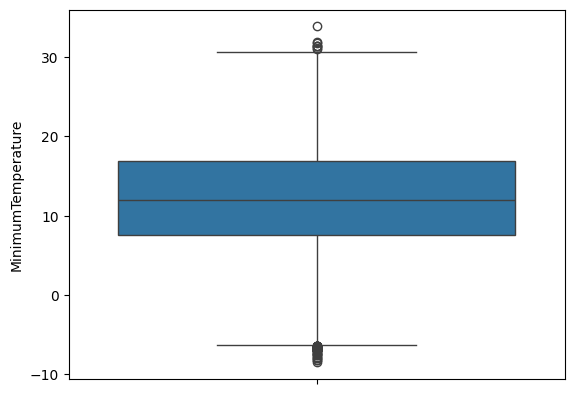

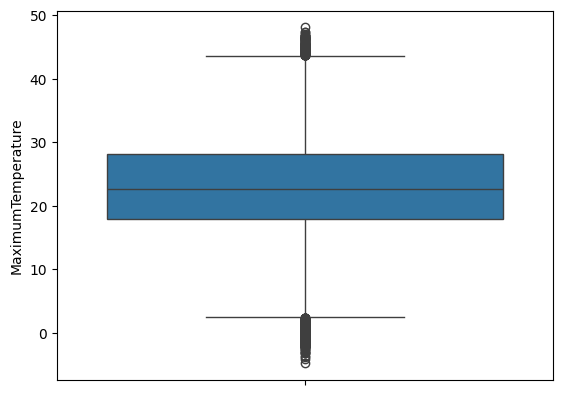

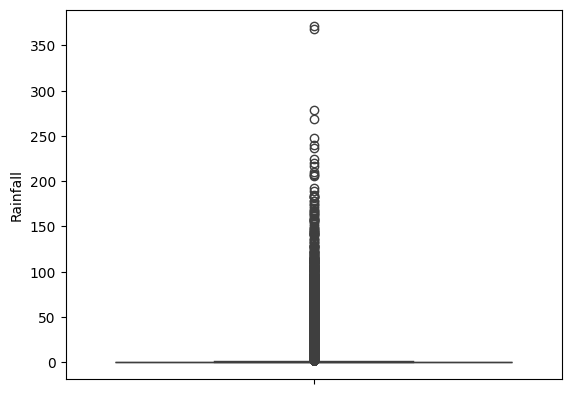

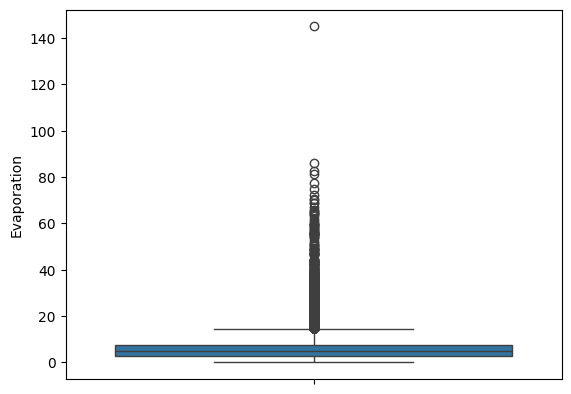

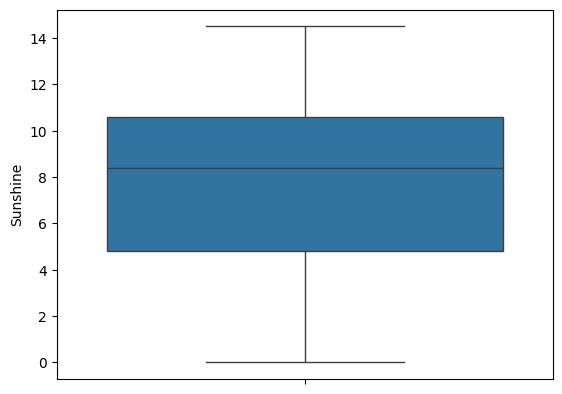

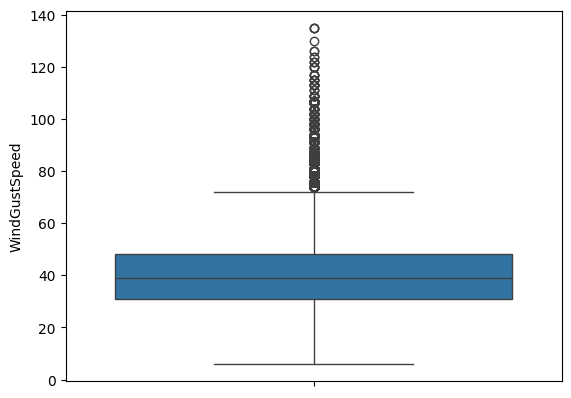

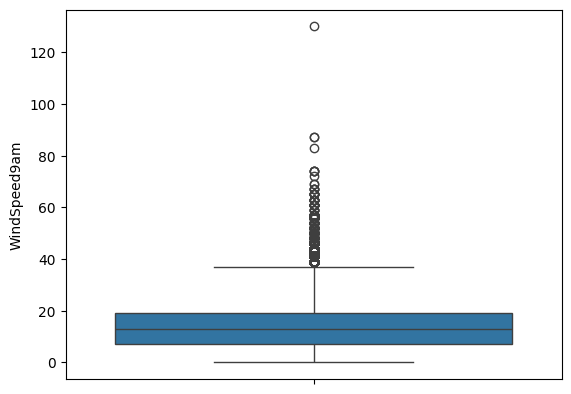

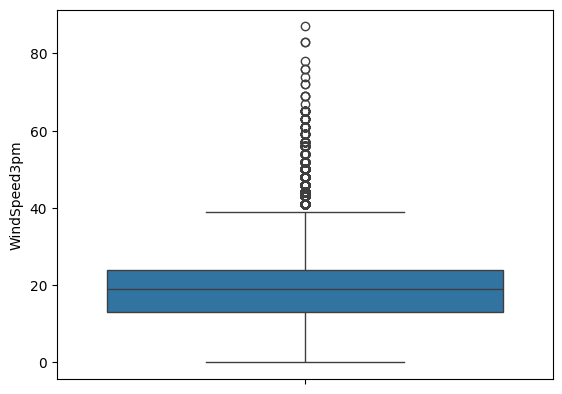

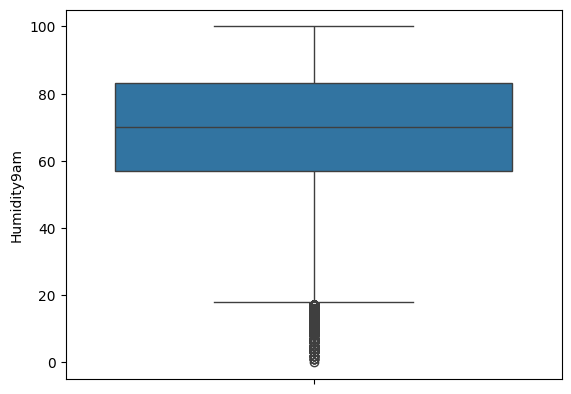

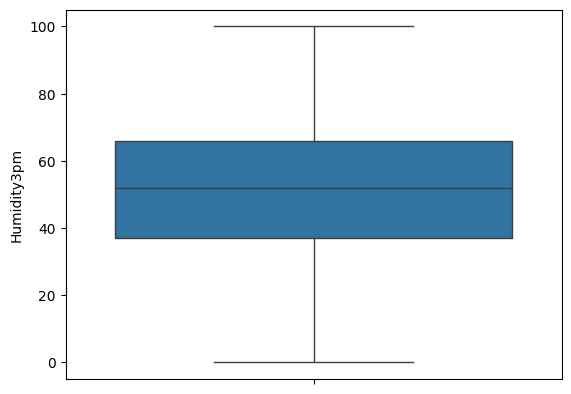

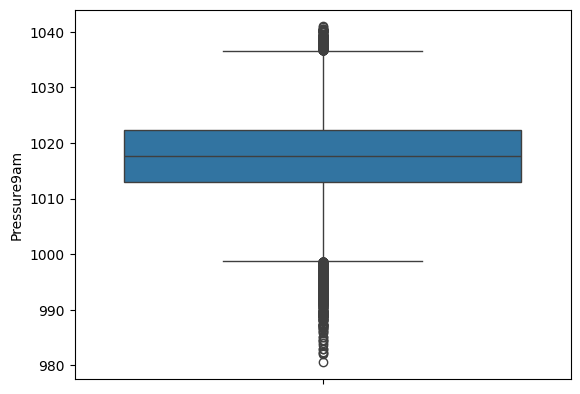

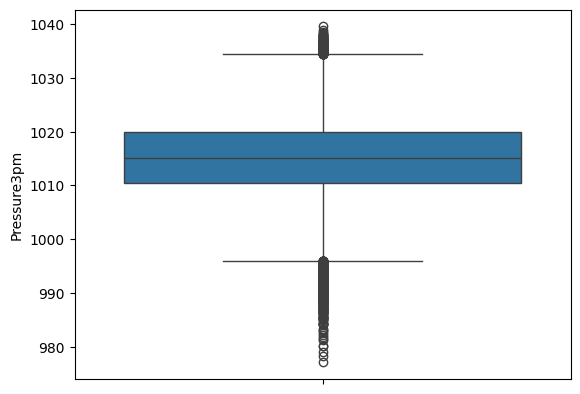

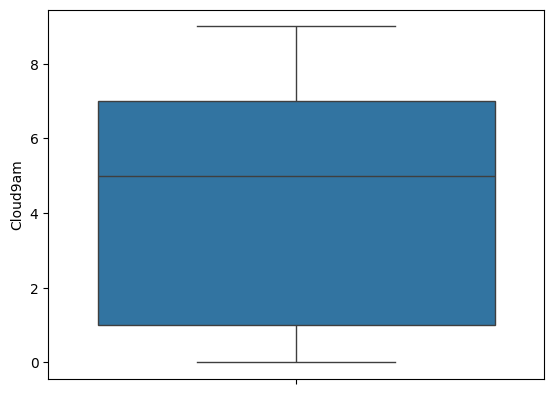

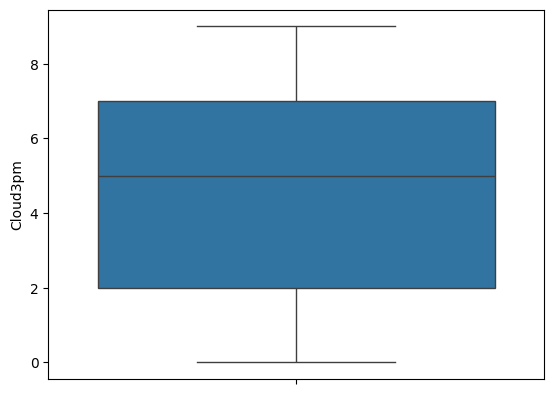

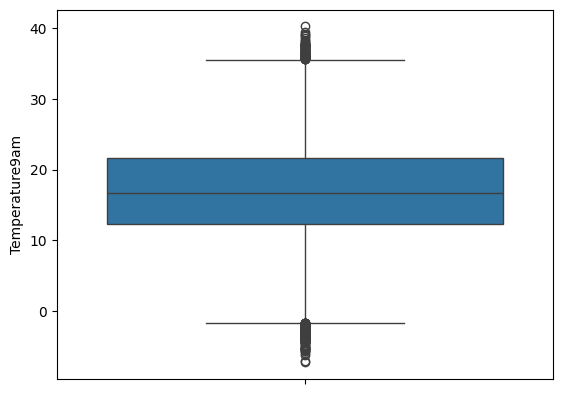

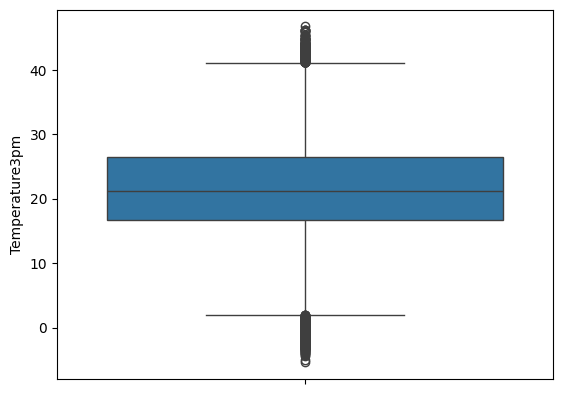

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ncols = df.select_dtypes(include=['number']).columns
for cols in ncols:
  sns.boxplot(df[cols])
  plt.show()

In [ ]:
# prompt: extrect column names

# Assuming df is already loaded as in the provided code
column_names = df.columns.tolist()
column_names


['Date',
 'Location',
 'MinimumTemperature',
 'MaximumTemperature',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDirection',
 'WindGustSpeed',
 'WindDirection9am',
 'WindDirection3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temperature9am',
 'Temperature3pm',
 'CloudBurst Today',
 'CloudBurstTomorrow']

In [ ]:
import pandas as pd

def cap_outliers_iqr(df):
    for col in df.select_dtypes(include=['number']):  # Process only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Cap values
    return df


df = cap_outliers_iqr(df)



              Date Location  MinimumTemperature  MaximumTemperature  Rainfall  \
0       01-12-2008   Albury                13.4                22.9       0.6   
1       02-12-2008   Albury                 7.4                25.1       0.0   
2       03-12-2008   Albury                12.9                25.7       0.0   
3       04-12-2008   Albury                 9.2                28.0       0.0   
4       05-12-2008   Albury                17.5                32.3       1.0   
...            ...      ...                 ...                 ...       ...   
145455  21-06-2017    Uluru                 2.8                23.4       0.0   
145456  22-06-2017    Uluru                 3.6                25.3       0.0   
145457  23-06-2017    Uluru                 5.4                26.9       0.0   
145458  24-06-2017    Uluru                 7.8                27.0       0.0   
145459  25-06-2017    Uluru                14.9                 NaN       0.0   

        Evaporation  Sunshi

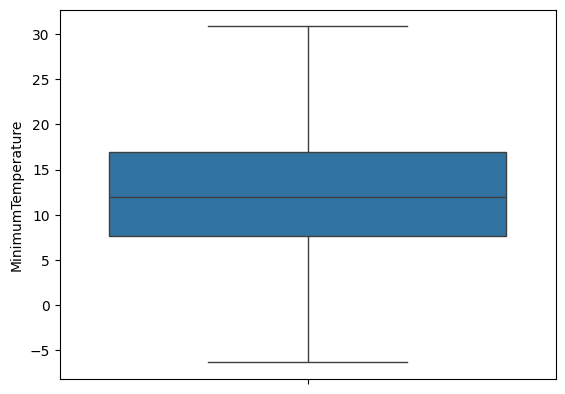

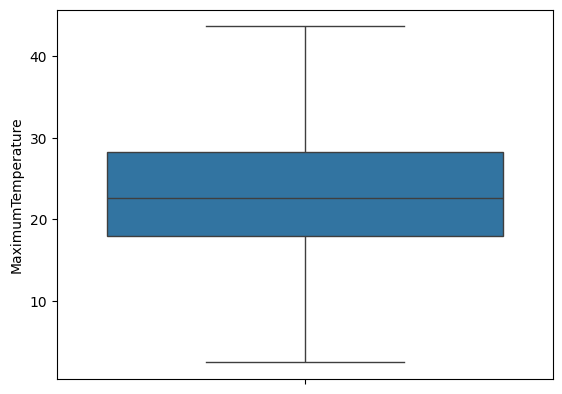

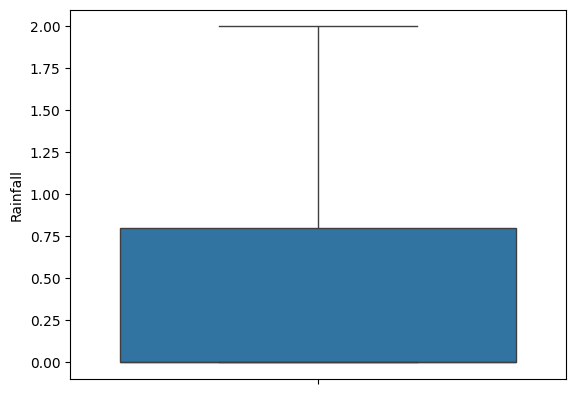

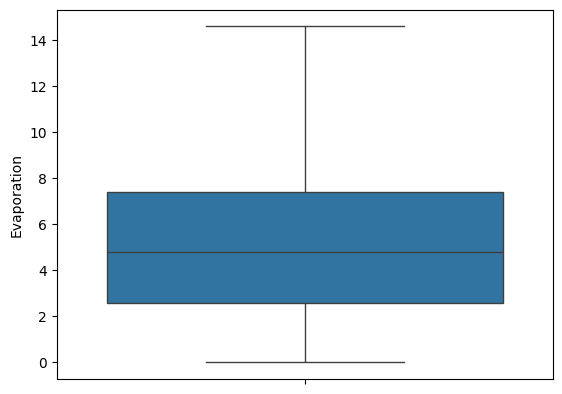

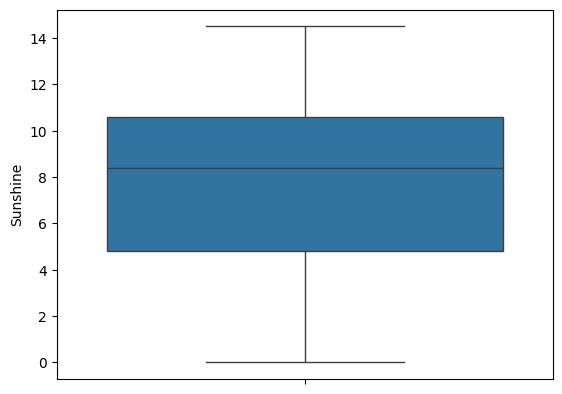

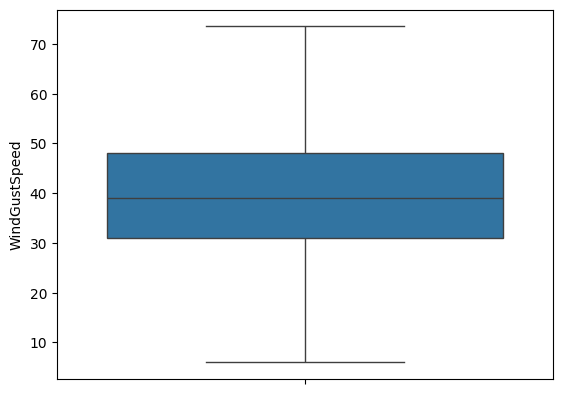

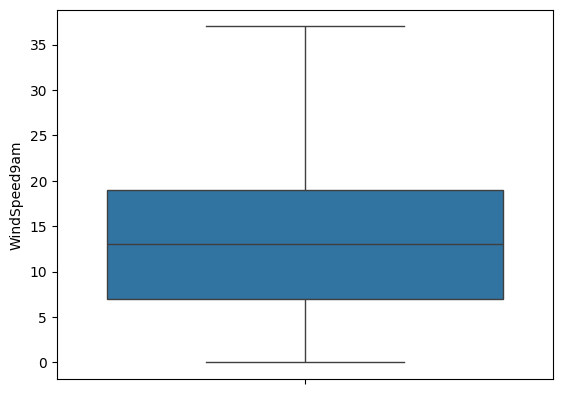

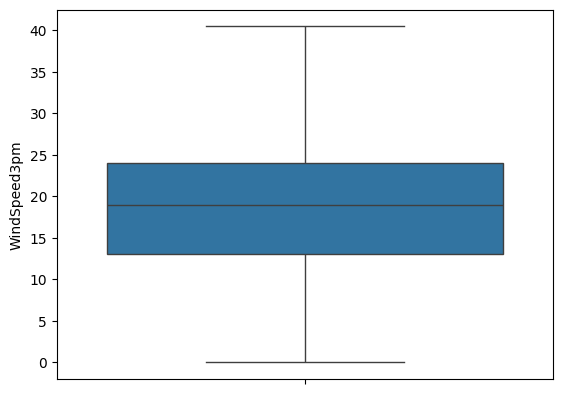

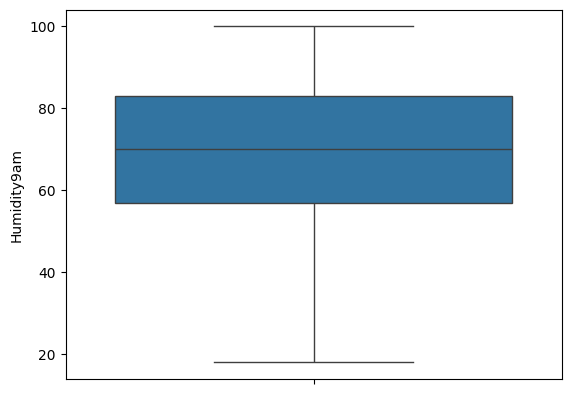

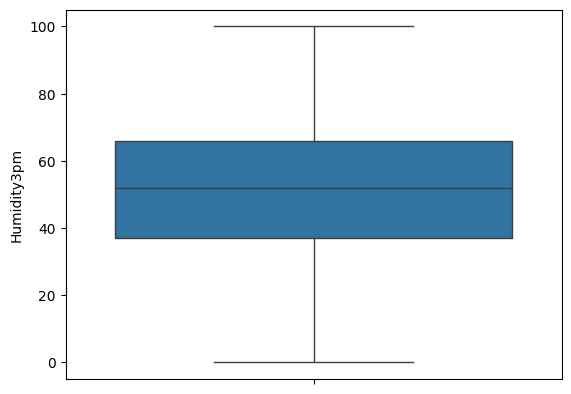

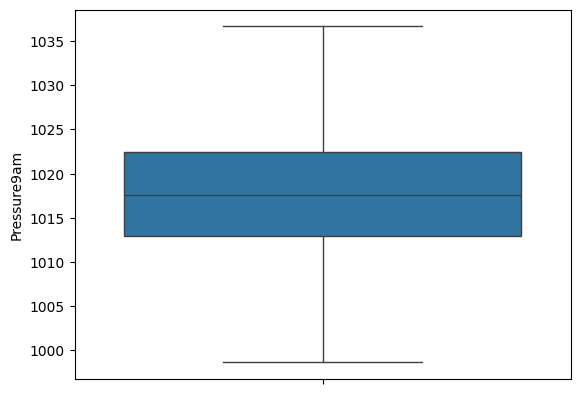

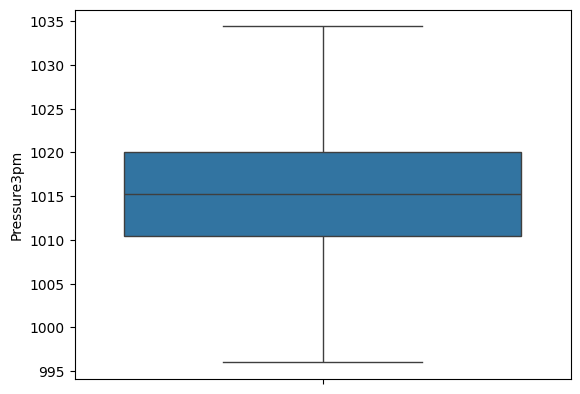

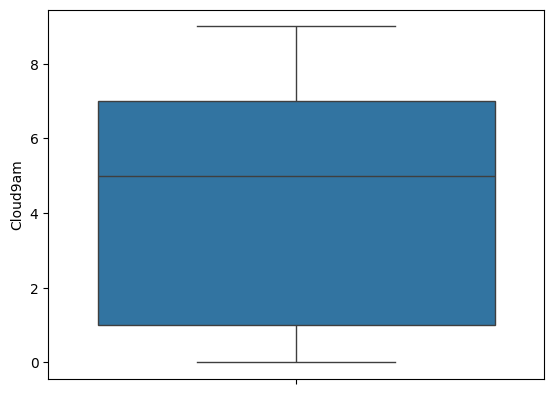

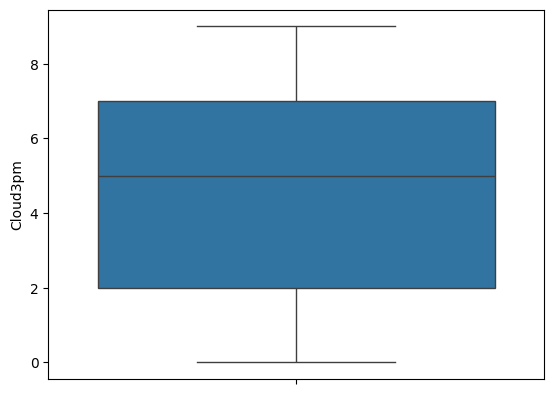

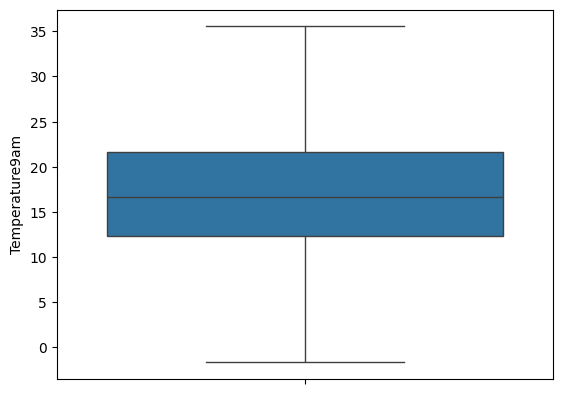

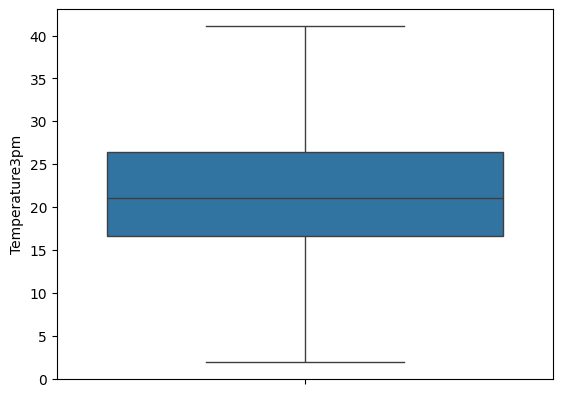

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ncols = df.select_dtypes(include=['number']).columns
for cols in ncols:
  sns.boxplot(df[cols])
  plt.show()

In [ ]:

df.to_csv('/content/drive/MyDrive/to_test.csv', index=False)


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/to_test.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,1485
MaximumTemperature,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDirection,10326
WindGustSpeed,10263
WindDirection9am,10566


In [2]:
# prompt: fill numerical null with mean and categorical nulls with mode

# Assuming df is already loaded and outliers are handled as in the previous code.
# Import necessary libraries if not already imported
import pandas as pd
from scipy.stats import skew

# Fill numerical nulls with mean or median based on skewness
for column in df.columns:
    if df[column].isnull().sum() > 0 and pd.api.types.is_numeric_dtype(df[column]):
        column_skewness = skew(df[column].dropna())
        if abs(column_skewness) > 0.5:
            df[column].fillna(df[column].median(), inplace=True)
            print(f"Filled {column} with median.")
        else:
            df[column].fillna(df[column].mean(), inplace=True)
            print(f"Filled {column} with mean.")

# Fill categorical nulls with mode
for column in df.columns:
    if df[column].isnull().sum() > 0 and df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
        print(f"Filled {column} with mode: {mode_value}")


<ipython-input-2-9b85ccefe24d>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-2-9b85ccefe24d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Filled MinimumTemperature with mean.
Filled MaximumTemperature with mean.
Filled Rainfall with median.
Filled Evaporation with median.
Filled Sunshine with mean.
Filled WindGustSpeed with median.
Filled WindSpeed9am with median.
Filled WindSpeed3pm with mean.
Filled Humidity9am with mean.
Filled Humidity3pm with mean.
Filled Pressure9am with mean.
Filled Pressure3pm with mean.
Filled Cloud9am with mean.
Filled Cloud3pm with mean.
Filled Temperature9am with mean.
Filled Temperature3pm with mean.


<ipython-input-2-9b85ccefe24d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


Filled WindGustDirection with mode: W
Filled WindDirection9am with mode: N
Filled WindDirection3pm with mode: SE
Filled CloudBurst Today with mode: No
Filled CloudBurstTomorrow with mode: No


In [3]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,0
MaximumTemperature,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDirection,0
WindGustSpeed,0
WindDirection9am,0
